## TV Shows and Movies listed on Netflix
This dataset consists of tv shows and movies available on Netflix as of 2019. 
The dataset is collected from Flixable which is a third-party Netflix search engine.


### Inspiration
Some of the interesting questions (tasks) which can be performed on this dataset -

1. Understanding what content is available in different countries
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights
4. Is Netflix has increasingly focusing on TV rather than movies in recent years.

### What each column stand for
- show_id - Unique ID for every Movie / Tv Show
- type - Identifier - A Movie or TV Show
- title - Title of the Movie / Tv Show
- director - Director of the Movie
- cast - Actors involved in the movie / show
- country - Country where the movie / show was produced
- date_added - Date it was added on Netflix
- release_year - Actual Release year of the move / show
- rating - TV Rating of the movie / show
- duration - Total Duration - in minutes or number of seasons
- listed_in - Genere
- description - The summary description

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly
plotly.offline.init_notebook_mode(connected = True)
from collections import Counter




In [2]:
#Reading dataset
data = pd.read_csv("netflix_titles.csv")
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
#Checking the percentage of null values
data.isnull().sum()/len(data)*100.0

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

**Director** column has the highest percentage of null values which is **30%** and we can't drop it since it has signficant data we need. 
But for the other columns we can drop them since the percentage is very small


# What type program do you want? - Movie or Tv Show ?

In [5]:
netflix_data = pd.DataFrame(data.groupby('type')["title"].count())
netflix_data.reset_index(inplace=True)
netflix_data.columns=["type","value"]
fig = px.pie(netflix_data,values="value",names="type",title="Total ratio of program type", hole=.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

From the results above it clearly shows that netflix has more movies than TV shows 

In [6]:
#Comparing different content on Netflix from the year 2000

data['content_produced']=1

dataset = data.pivot_table(index=["type","release_year"],values="content_produced",aggfunc="sum",fill_value=0)

dataset = dataset.reset_index()

fig = px.bar(dataset[dataset['release_year']>2000],x="release_year",y="content_produced",color="type",text="content_produced")
fig.update_layout(barmode='group')
fig.update_traces(textposition='outside')
fig.show()

## Netflix Growth rate over time

In [7]:
# total content produced 

data['content_produced']=1

dataset = data.pivot_table(index=["type","release_year"],values="content_produced",aggfunc="sum",fill_value=0)

dataset = dataset.reset_index()

fig = px.line(dataset[dataset['release_year']>1990],x="release_year",y="content_produced",color="type")
fig.update_layout(barmode='group')
fig.show()

After 2016 netlix has shown anormous growth


## Top 20 Countries where Netflix content was produced

In [8]:

import re  #for regular expression
import os #The OS module in Python provides functions for interacting with the operating system

country = data[~data["country"].isnull()]['country'].to_list()

#Changing the countries to a list
country = str(country)

#replace occurrences of sub-string with another empty sub-string and deleting some.
country = re.sub("[\'\]\[]","",country)
country = re.sub(" {2,}", " ", country)

#changing the list to dataframe
country = pd.Series(country.split(",")).value_counts()

country = pd.DataFrame(country)
country.reset_index(inplace=True)

country.columns=["country","count"]

fig = px.bar(country.head(20), x="country", y="count",title="Top 20 Netflix country",text="count",color="country")
fig.update_traces(textposition="outside")
fig.show()


In [9]:
#Top 10 countries 
country.head(10)

,country,count
0,United States,3297
1,India,990
2,United Kingdom,723
3,Canada,412
4,France,349
5,Japan,287
6,Spain,215
7,South Korea,212
8,Germany,199
9,Mexico,154


From above, Netflix records best Number of Movies and Tv Shows on United States. and India, United Kingdom followed. Also in other countries.
We can also see that Netflix is a global company since it has produced much content in other countries too



## What Genre that has been produced most?

In [10]:
#Getting listed in data 
genre = data[~data["listed_in"].isnull()]['listed_in'].to_list()

#changing the genre to a list
genre = str(genre)

genre = re.sub("[\'\]\\\[]","",genre)
genre = re.sub(" {2,}", " ", genre)

genre = pd.Series(genre.split(", ")).value_counts()

#Changing the list to dataframe
genre = pd.DataFrame(genre)
genre.reset_index(inplace=True)
genre.columns=["genre","count"]

#creating a barchart
fig = px.bar(genre.head(20), x="genre", y="count",title="Genre Top20",text="count",color="genre")
fig.update_traces(textposition="outside")
fig.show()

In [11]:
# Top 10 Genres
genre.head(10)

,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,694
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


International Movies, Dramas, Comedies, International Tv Shows recorded high values. This shows that netflix produces more internaltional and drama contents
¶


In [46]:
rating = pd.DataFrame(data.groupby("rating")["title"].count())

rating.reset_index(inplace=True)

rating.columns=["rating", "count"]

#sorting data
rating =pd.DataFrame(rating)
rating = rating.sort_values(by=['count'], ascending=False)

#creating a barchart
fig = px.bar(rating, x="rating", y="count",title="Rating Count",text="count",color="rating")
fig.update_traces(textposition="outside")

fig.show()

In [47]:
fig = px.pie(rating, values="count",names='rating',hole=.5,title="Rating proportions")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Who is the best director?

Getting the best director by sorting the directing in top 10

In [49]:
director = pd.DataFrame(data.director.value_counts())

director.reset_index(inplace=True)

director.columns=["director","count"]

fig = px.bar(director.head(10), x="director", y="count",color="director",text="count",title="More than 10 Movies or Tv Programs")
fig.update_traces(textposition="outside")
fig.show()

In [50]:
cast = data[~data["cast"].isnull()]['cast'].to_list()
cast = str(cast)
cast = re.sub("[\'\]\\\[]","",cast)
cast = re.sub(" {2,}", " ", cast)
cast_series = pd.Series(cast.split(", ")).value_counts()

cast = pd.DataFrame(cast_series)
cast.reset_index(inplace=True)
cast.columns=["cast","count"]

fig = px.bar(cast.head(50), x="cast", y="count",title="Cast Top20",text="count",color="cast")
fig.update_traces(textposition="outside")
fig.update
fig.show()

### Top 10 actors involved in either movies or TV shows

In [51]:

cast.head(10)

,cast,count
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,30
3,Om Puri,30
4,Takahiro Sakurai,29
5,Amitabh Bachchan,27
6,Yuki Kaji,27
7,Akshay Kumar,27
8,Paresh Rawal,27
9,Boman Irani,26


## Run time of Movies

In [59]:
movie = data[data["type"] =='Movie']

def making_min(minit):
    return minit.split(" ")[0]

movie["duration"] = movie["duration"].apply(making_min)

movie["duration"] = movie["duration"].astype(int)


px.histogram(movie["duration"], range_x = (0,200),title="Movie's Run Time")



C:\Users\Faith Kanini\anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Faith Kanini\anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
#Since we can't apply split on Null values we will need to skip null values on date_created column
data_new = data[data['date_added'].notnull()]
data_new['Added_Year']=data_new['date_added'].apply(lambda x: x.split(', ')[-1])
data_new['Added_Month']=data_new['date_added'].apply(lambda x: x.split(' ')[0])
data_new['Added_Day']=data_new['date_added'].apply(lambda x:x.lstrip().split(' ')[1])
data_new['Added_Day']=data_new['Added_Day'].apply(lambda x:x.split(',')[0])

# show.drop(columns=['show_id','date_added'],inplace=True)

#'Added_Year' and 'Added_Day' are of incorrect format.

data_new['Added_Year']=data_new['Added_Year'].astype(int)
data_new['Added_Day']=data_new['Added_Day'].astype(int)

data_new['after_release_difference']=abs(data_new['Added_Year']-data['release_year'])
data_diff_percent=data_new['after_release_difference'].value_counts(normalize=True).sort_values(ascending=False)[:10]
data_diff_percent*100
pd.DataFrame(data_diff_percent)

C:\Users\Faith Kanini\anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Faith Kanini\anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Faith Kanini\anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,after_release_difference
0.0,0.363251
1.0,0.192234
2.0,0.082937
3.0,0.056577
4.0,0.043204
5.0,0.029060
6.0,0.028031
7.0,0.021731
8.0,0.020702
9.0,0.017873


less than 1% of TV shows or movies that are were released on Netflix or they were added months after their release in the same year.
Followed by 18% of shows or movies are added on netflix after 1 year of their release.

## In which year maximum content is released?

Text(0, 0.5, 'Year of Release')

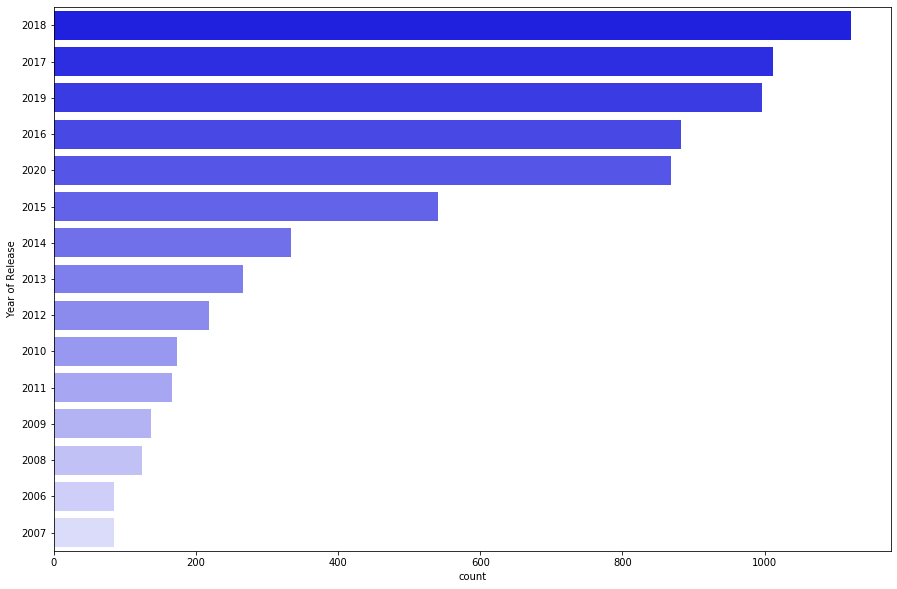

In [78]:
plt.figure(figsize=(15,10))
p=sns.light_palette(color='blue',n_colors=16,reverse=True)
sns.countplot(y='release_year',data=data,palette=p,order=data['release_year'].value_counts().index[:15])
plt.ylabel("Year of Release")

Most of Movies and TV shows were released in 2018